# Exercise 1 – Bayesian inference and Data assimilation

### Problem 1.

**Here we define a function `vanderpol_euler` that takes as input the initial values `x0` and `y0`, the time step `dt`. The function uses the Euler scheme to compute the values of `x` and `y` at each time step and returns  the computed values of `x` and `y`.**

**Then we call this function with different values of `dt` and plot the results.**

### *Contribution* : `Md Niaz Morshed`,  `Mohammad Hasan`

**from initial value x(0) = y(0) = 0.1. Implement Euler scheme for this system up to time t = 30 with uniform time discretisation.**

**Plot (x(t), y(t)) for 0 ≤ t ≤ 30 with Δt = 0.01.**

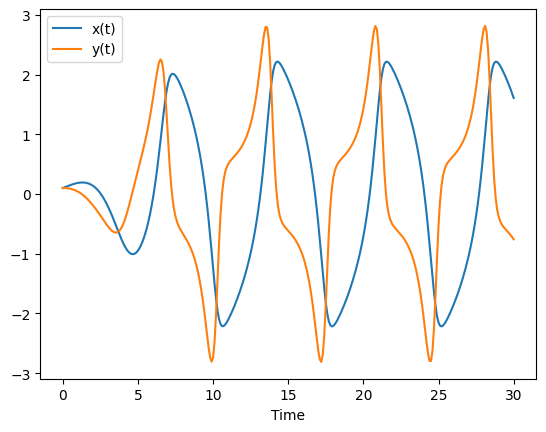

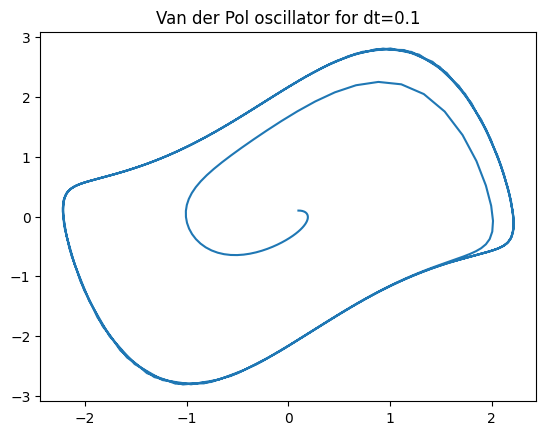

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 30      # final time
dt = 0.1   # time step size
N = int(T/dt)  # number of time steps

# Initial conditions
x0 = 0.1
y0 = 0.1

# Arrays to store solution
x = np.zeros(N+1)
y = np.zeros(N+1)

# Set initial values
x[0] = x0
y[0] = y0

def vanderpol_euler(x_0, y_0, dt):
    for n in range(N):
      x[n+1] = x[n] + dt*y[n]
      y[n+1] = y[n] + dt*(-x[n] + (1-x[n]**2)*y[n])
    return x, y

x, y = vanderpol_euler(x0, y0, dt)
# Plot solution
t = np.linspace(0, T, N+1)
plt.plot(t, x, label='x(t)')
plt.plot(t, y, label='y(t)')
plt.xlabel('Time')
plt.legend()
plt.show()
## Plotting the oscillator
plt.plot(x, y)
plt.title(f"Van der Pol oscillator for dt={dt}")
plt.show()

**Change the time step to Δt = 0.2 and Δt = 0.3, then plot the results.**


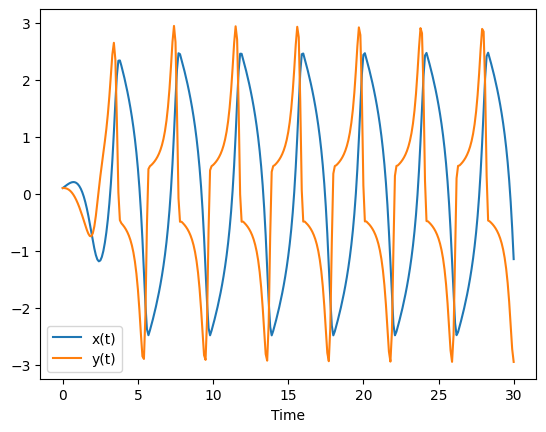

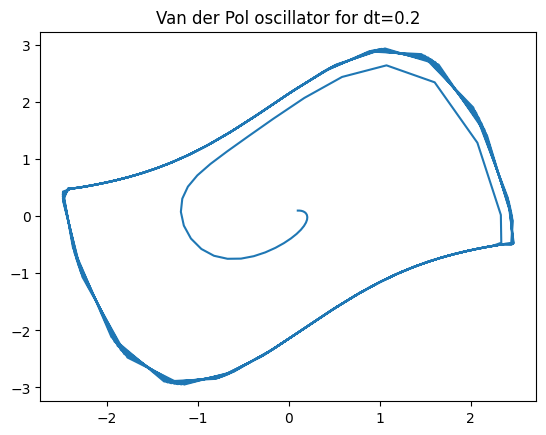

In [2]:
# plotting for dt=0.2
dt = 0.2   # time step size

x, y = vanderpol_euler(x0, y0, dt)
# Plot solution
t = np.linspace(0, T, N+1)
plt.plot(t, x, label='x(t)')
plt.plot(t, y, label='y(t)')
plt.xlabel('Time')
plt.legend()
plt.show()
## Plotting the oscillator
plt.plot(x, y)
plt.title(f"Van der Pol oscillator for dt={dt}")
plt.show()

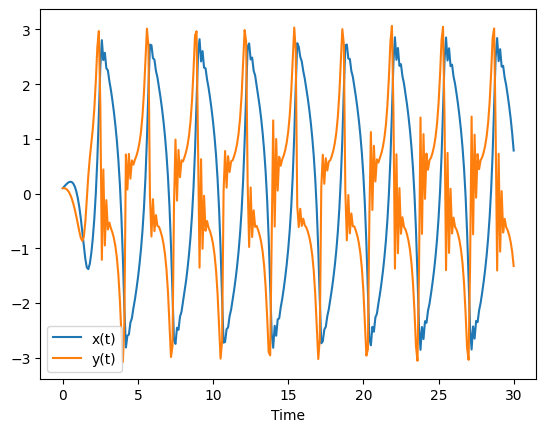

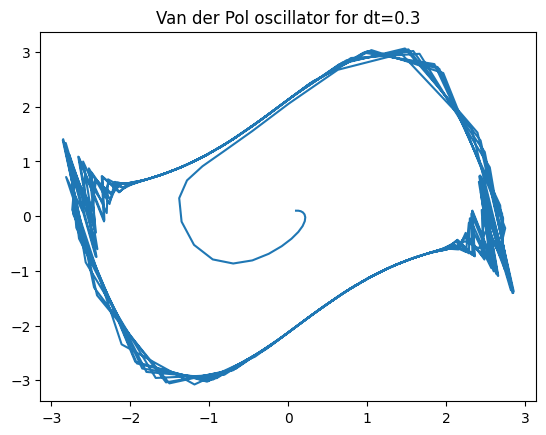

In [3]:
# plotting for dt=0.2
dt = 0.3   # time step size

x, y = vanderpol_euler(x0, y0, dt)
# Plot solution
t = np.linspace(0, T, N+1)
plt.plot(t, x, label='x(t)')
plt.plot(t, y, label='y(t)')
plt.xlabel('Time')
plt.legend()
plt.show()
## Plotting the oscillator
plt.plot(x, y)
plt.title(f"Van der Pol oscillator for dt={dt}")
plt.show()

**Play further with the time step until it finds numerical
instability. Also simulate the oscillator with different initial values.**

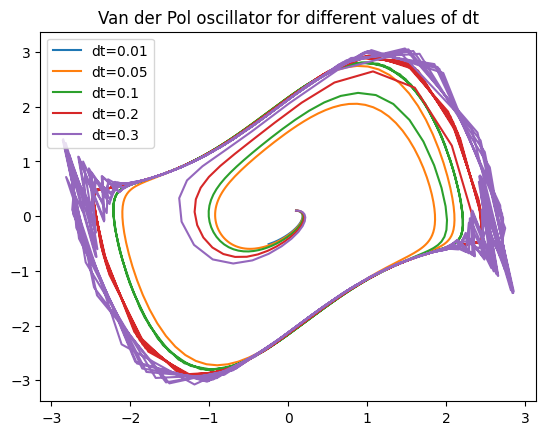

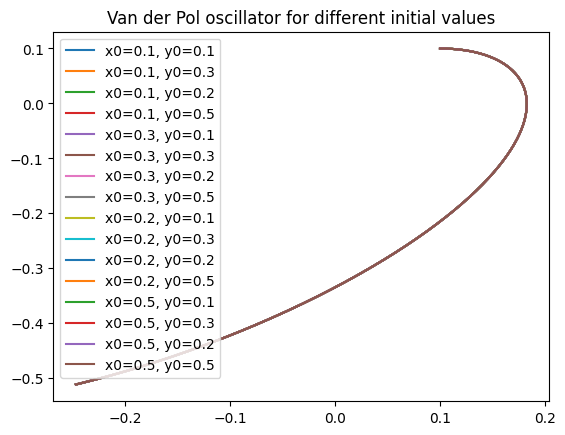

In [4]:
# Plot for different values of dt
dts = [0.01, 0.05, 0.1, 0.2, 0.3]
for dt in dts:
    x, y = vanderpol_euler(0.1, 0.1, dt)
    plt.plot(x, y)
plt.legend([f"dt={dt}" for dt in dts])
plt.title("Van der Pol oscillator for different values of dt")
plt.show()

# Plot for different initial values
x0s = [0.1, 0.3, 0.2, 0.5]
y0s = [0.1, 0.3, 0.2, 0.5]
for x0 in x0s:
    for y0 in y0s:
        x, y = vanderpol_euler(x0, y0, 0.01)
        plt.plot(x,y)
plt.legend([f"x0={x0}, y0={y0}" for x0 in x0s for y0 in y0s])
plt.title("Van der Pol oscillator for different initial values")
plt.show()

* We can see that when dt is larger than 0.3, the plot blows up.

### Problem 2.
**Here we define a function `harmonic_euler` that takes as input the initial values `x0` and `y0`, the time step `dt`, and the maximum time `t_max`. The function uses the Euler scheme to compute the values of `x` and `y` at each time step and returns the time array `t` and the computed values of `x` and `y`.**

**Then we call this function with different values of `dt`, computes the values of `y` at times `t=5` and `t=10`, and uses these values to solve for `x0` and `y0`.**

### *Contribution :* `Shahriar Shohid Choudhury`, `Jayed Akbar Sumon`

**Simulate the harmonic oscillator from initial value x(0) = y(0) = 1.0 using Euler scheme
with Δt = 0.01. Obtain the values of y(5) and y(10).**

In [5]:
import numpy as np

def harmonic_euler(x0, y0, dt, t_max):
    t = np.arange(0, t_max+dt, dt)
    x = np.zeros_like(t)
    y = np.zeros_like(t)
    x[0] = x0
    y[0] = y0
    for i in range(1, t.size):
        x[i] = x[i-1] + dt * y[i-1]
        y[i] = y[i-1] - dt * x[i-1]
    return t, x, y

x0 = y0 = 1.0
t_max = 10

# Compute values for dt = 0.01
dt = 0.01
t, x, y = harmonic_euler(x0, y0, dt, t_max)
y5 = y[int(5/dt)]
y10 = y[int(10/dt)]
print(f"y(5)={y5:.4f}, y(10)={y10:.4f}")

y(5)=1.2739, y(10)=-0.3107


**Solve x0 and y0 from the values of y(5) and y(10) you obtained in the previous step. Is
it reasonably close to the true value?**

In [6]:
# Solve for x0 and y0
A = np.array([[np.sin(5), -np.cos(5)], [np.sin(10), -np.cos(10)]])
b = np.array([y5, y10])
x0_estimated, y0_estimated = np.linalg.solve(A, b)
print(f"x0={x0_estimated:.4f}, y0={y0_estimated:.4f}")

x0=-1.0228, y0=-1.0334


*The estimated values seems to be reasonably closed to the true values.*

**Increase the time step Δt to 0.1 and repeat the procedure. How is the result different
from the previous one?**

In [7]:
# Compute values for dt = 0.1
dt = 0.1
t, x, y = harmonic_euler(x0, y0, dt, t_max)
y5 = y[int(5/dt)]
y10 = y[int(10/dt)]
print(f"y(5)={y5:.4f}, y(10)={y10:.4f}")

y(5)=1.5790, y(10)=-0.5603


*The result is significantly different than the previous one.*

In [8]:
# Solve for x0 and y0
A = np.array([[np.sin(5), -np.cos(5)], [np.sin(10), -np.cos(10)]])
b = np.array([y5, y10])
x0_estimated, y0_estimated = np.linalg.solve(A, b)
print(f"x0={x0_estimated:.4f}, y0={y0_estimated:.4f}")

x0=-1.2159, y0=-1.4561


*As we can see the estimated value is much far away than the true values after the change of `dt`.*

**Play with the time step. Decrease Δt towards zero
and plot the relationship of Δt vs the error |x0 − 1|.**

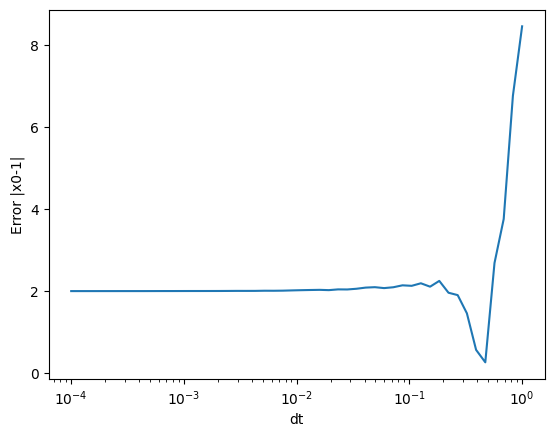

In [9]:
dts = np.logspace(-4, 0, 50)
errors = []
for dt in dts:
    t, x, y = harmonic_euler(x0, y0, dt, t_max)
    y5 = y[int(5/dt)]
    y10 = y[int(10/dt)]
    A = np.array([[np.sin(5), -np.cos(5)], [np.sin(10), -np.cos(10)]])
    b = np.array([y5, y10])
    x0_estimated, _ = np.linalg.solve(A, b)
    errors.append(np.abs(x0_estimated - 1))

plt.plot(dts, errors)
plt.xscale("log")
plt.xlabel("dt")
plt.ylabel("Error |x0-1|")
plt.show()